In [1]:
import os
import torch
import numpy as np 
import math
import matplotlib.pyplot as plt
from eval import *

## Filename


- Format:
task_digits_ex_dec_eptrain_eptest_mode_niter_Nh_Nk_lr_lrconst_kappa_Nb_nll_time

- Example: 
```task-prediction_digits-2_ex-single_dec-majority_eptrain-30_eptest-30_mode-iw_niter-3_Nh-2_Nk-10_lr-0.05_lrconst-1.5_kappa-0.05_Nb-8_nll-10_time-03131500.pth```

fixed variable: task, ex, dec, eptrain, eptest
control variable: mode (mb, iw, iwb, gem), niter, Nh, Nk, Nb, nll (integer), lr, lrconst, kappa (float)

In [2]:
input_hprof_1 = { 
'task': 'prediction',
'digits': '2',
'ex': 'single',
'dec': 'majority',
'eptrain': '10',
'eptest': '30',
'mode': 'iw',
'Nh': '2',
'Nk': '10',
'lr': '0.05',
'lrconst': '1.5',
'kappa': '0.05',
'Nb': '8',
'nll': '10',
'time': '03131600'
}    
input_hprof_2 = { 
'task': 'prediction',
'digits': '2',
'ex': 'single',
'dec': 'majority',
'eptrain': '30',
'eptest': '30',
'mode': 'iw',
'niter': '3',
'Nh': '2',
'Nk': '10',
'lr': '0.05',
'lrconst': '1.5',
'kappa': '0.05',
'Nb': '8',
'nll': '10'
}    


In [3]:
hprof_file_list = load_hprof_from_files('res')
# hprof_file_list

In [4]:
metrics = ['loss_output_train_t', 'acc_train_t', 'spikenum_hid_t']
time_range = ['03131200', '03131830']
# time_range = ['03131200', '03131330']

target_hprofs_1 = get_hprof_separate_iter(hprof_file_list, input_hprof_1, time_range)
len(target_hprofs_1)

3

In [5]:
r_1 = get_stat_for_hprof(target_hprofs_1, metrics)
r_1

{'loss_output_train_t': array([[-33415.62890625, -33415.62890625, -20489.4296875 ],
       [-12025.88085938, -12025.88085938,  -8717.87890625],
       [ -6845.67578125,  -6845.67578125,  -6368.36669922],
       [ -4381.99658203,  -4381.99658203,  -5211.83105469],
       [ -3527.9140625 ,  -3527.9140625 ,  -4469.60205078],
       [ -2917.02978516,  -2917.02978516,  -3957.89477539],
       [ -2547.62646484,  -2547.62646484,  -3557.6784668 ],
       [ -2291.2902832 ,  -2291.2902832 ,  -3257.36791992],
       [ -2104.32324219,  -2104.32324219,  -3021.91918945],
       [ -1957.88500977,  -1957.88500977,  -2822.79394531]]), 'acc_train_t': array([[0.        , 0.        , 0.03333334],
       [0.30000001, 0.30000001, 0.69999999],
       [0.        , 0.        , 0.63333333],
       [0.1       , 0.1       , 0.73333335],
       [0.60000002, 0.60000002, 0.76666665],
       [0.40000001, 0.40000001, 0.89999998],
       [0.69999999, 0.69999999, 0.86666667],
       [0.30000001, 0.30000001, 0.76666665],

{'loss_output_train_t': {'num_of_iter': 3,
  'mertic': 'loss_output_train_t',
  'timestep': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  'mean': array([-29106.89583333, -10923.21354167,  -6686.57275391,  -4658.60807292,
          -3841.81005859,  -3263.9847819 ,  -2884.31046549,  -2613.31616211,
          -2410.18855794,  -2246.18798828]),
  'var': array([37130361.3872918 ,  2431750.42708418,    50627.54661989,
           153027.83377971,   197061.39272738,   240755.53953236,
           226712.23258878,   207401.33337069,   187107.18276407,
           166237.21484196]),
  'std': array([6093.46874836, 1559.40707549,  225.00565908,  391.18772192,
          443.91597485,  490.66846193,  476.14307995,  455.41336538,
          432.5588778 ,  407.72198229]),
  'confidence_interval': array([6895.40901145, 1764.63522583,  254.61787257,  442.67057964,
          502.33821485,  555.24363441,  538.80661735,  515.34873703,
          489.4864497 ,  461.38085661])},
 'acc_train_t': {'num_of_iter': 3,
  '

In [6]:
target_hprofs_2 = get_hprof_separate_iter(hprof_file_list, input_hprof_2)
r_2 = get_stat_for_hprof(target_hprofs_2, metrics)

{'loss_output_train_t': array([[-20489.4296875 ],
       [ -8717.87890625],
       [ -6368.36669922],
       [ -5211.83105469],
       [ -4469.60205078],
       [ -3957.89477539],
       [ -3557.6784668 ],
       [ -3257.36791992],
       [ -3021.91918945],
       [ -2822.79394531]]), 'acc_train_t': array([[0.03333334],
       [0.69999999],
       [0.63333333],
       [0.73333335],
       [0.76666665],
       [0.89999998],
       [0.86666667],
       [0.76666665],
       [0.69999999],
       [0.76666665]]), 'spikenum_hid_t': array([[2379.],
       [2059.],
       [2042.],
       [2016.],
       [2038.],
       [2029.],
       [2015.],
       [2032.],
       [2028.],
       [2030.]])}


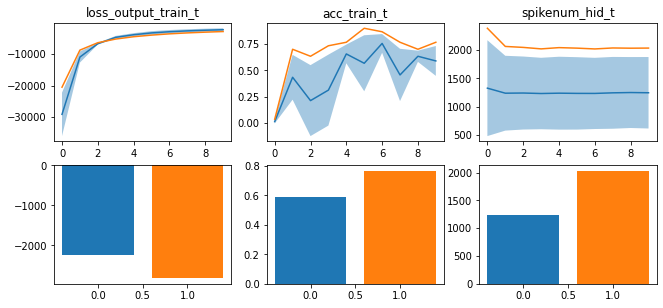

In [7]:
plot_one_feature([r_1, r_2], metrics)